In [1]:
import pandas as pd
import re

## 'Covid Data'

In [2]:
data = pd.read_csv("C:\\Users\\ayushjain9\\Desktop\\TwitterProject\\data\\combine.csv")

In [3]:
data.shape

(870589, 10)

In [4]:
#Remove duplicates from Content column
data.drop_duplicates(subset ="Content", inplace = True)

In [5]:
data.shape

(377547, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377547 entries, 0 to 870566
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Datetime         377546 non-null  object
 1   Tweet Id         377545 non-null  object
 2   Content          377546 non-null  object
 3   Location         348776 non-null  object
 4   Retweeted Tweet  2 non-null       object
 5   Retweeted Count  377543 non-null  object
 6   Like Count       377543 non-null  object
 7   Hashtags         377394 non-null  object
 8   Follower Count   377542 non-null  object
 9   Verified User    377542 non-null  object
dtypes: object(10)
memory usage: 31.7+ MB


In [7]:
## Retweeted Tweet is 2
data.drop(['Tweet Id', 'Retweeted Tweet'], axis = 1, inplace=True)

In [8]:
print(data.columns.values.tolist())

['Datetime', 'Content', 'Location', 'Retweeted Count', 'Like Count', 'Hashtags', 'Follower Count', 'Verified User']


In [9]:
data.columns = [ 'date', 'text','user_location', 'retweets', 'likes_count','hashtags', 'user_followers', 'user_verified']

In [10]:
data = data[['user_location','user_followers', 'user_verified','date', 'text', 'hashtags','retweets','likes_count' ]]

In [11]:
data.head()

,user_location,user_followers,user_verified,date,text,hashtags,retweets,likes_count
0,ประเทศไทย,33,FALSE,2020-03-01 23:34:58+00:00,Everyone takes care of their health please.✌🏽😷...,"['COVID', 'worldwide']",2,2
1,Mumbai,370,FALSE,2020-03-01 22:08:50+00:00,I landed in Mumbai at midnight and there was a...,['covid'],0,0
2,Dhaka,57502,FALSE,2020-03-01 22:03:21+00:00,Here are the latest developments on the #coron...,"['coronavirusoutbreak', 'COVID', 'Coronavid19']",7,12
3,"Dubai, United Arab Emirates",2061,TRUE,2020-03-01 20:00:10+00:00,@UltraAbuDhabi @MEFCC to go ahead as scheduled...,['COVID'],0,0
4,SunnySideOfLife,754,FALSE,2020-03-01 18:37:11+00:00,@AbeShinzo request general public to avoid spo...,"['COVID19', 'coronavirus', 'COVID', 'Japan', '...",0,0


In [12]:
# Correcting Date format
data['date'] = pd.to_datetime(data['date'], errors='coerce').dt.date

data['date'] = pd.to_datetime(data['date'], errors='coerce').dt.date

In [13]:
data.head()

,user_location,user_followers,user_verified,date,text,hashtags,retweets,likes_count
0,ประเทศไทย,33,FALSE,2020-03-01,Everyone takes care of their health please.✌🏽😷...,"['COVID', 'worldwide']",2,2
1,Mumbai,370,FALSE,2020-03-01,I landed in Mumbai at midnight and there was a...,['covid'],0,0
2,Dhaka,57502,FALSE,2020-03-01,Here are the latest developments on the #coron...,"['coronavirusoutbreak', 'COVID', 'Coronavid19']",7,12
3,"Dubai, United Arab Emirates",2061,TRUE,2020-03-01,@UltraAbuDhabi @MEFCC to go ahead as scheduled...,['COVID'],0,0
4,SunnySideOfLife,754,FALSE,2020-03-01,@AbeShinzo request general public to avoid spo...,"['COVID19', 'coronavirus', 'COVID', 'Japan', '...",0,0


## 'Vaccination Data'

In [14]:
data1 = pd.read_csv("C:\\Users\\ayushjain9\\Desktop\\TwitterProject\\data\\vaccination_all_tweets.csv")

In [15]:
data1.shape

(193272, 16)

In [16]:
data1.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [17]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193272 entries, 0 to 193271
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193272 non-null  int64 
 1   user_name         193271 non-null  object
 2   user_location     134699 non-null  object
 3   user_description  179542 non-null  object
 4   user_created      193272 non-null  object
 5   user_followers    193272 non-null  int64 
 6   user_friends      193272 non-null  int64 
 7   user_favourites   193272 non-null  int64 
 8   user_verified     193272 non-null  bool  
 9   date              193272 non-null  object
 10  text              193272 non-null  object
 11  hashtags          152299 non-null  object
 12  source            193153 non-null  object
 13  retweets          193272 non-null  int64 
 14  favorites         193272 non-null  int64 
 15  is_retweet        193272 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory

In [18]:
data1.drop(['id','user_name','user_description', 'user_created','user_friends','source','is_retweet','user_favourites'], axis = 1, inplace=True)

In [19]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193272 entries, 0 to 193271
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   user_location   134699 non-null  object
 1   user_followers  193272 non-null  int64 
 2   user_verified   193272 non-null  bool  
 3   date            193272 non-null  object
 4   text            193272 non-null  object
 5   hashtags        152299 non-null  object
 6   retweets        193272 non-null  int64 
 7   favorites       193272 non-null  int64 
dtypes: bool(1), int64(3), object(4)
memory usage: 10.5+ MB


In [20]:
data1.columns = [ 'user_location','user_followers', 'user_verified','date', 'text', 'hashtags','retweets','likes_count']

In [ ]:
data1.info()

In [21]:
data1.head()

,user_location,user_followers,user_verified,date,text,hashtags,retweets,likes_count
0,"La Crescenta-Montrose, CA",405,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],0,0
1,"San Francisco, CA",834,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,1,1
2,Your Bed,10,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",0,0
3,"Vancouver, BC - Canada",49165,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,446,2129
4,NaN,152,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",0,0


In [22]:
# Correcting Date format
data1['date'] = pd.to_datetime(data1['date'], errors='coerce').dt.date

In [23]:
data1.head()

,user_location,user_followers,user_verified,date,text,hashtags,retweets,likes_count
0,"La Crescenta-Montrose, CA",405,False,2020-12-20,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],0,0
1,"San Francisco, CA",834,False,2020-12-13,While the world has been on the wrong side of ...,NaN,1,1
2,Your Bed,10,False,2020-12-12,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",0,0
3,"Vancouver, BC - Canada",49165,True,2020-12-12,"Facts are immutable, Senator, even when you're...",NaN,446,2129
4,NaN,152,False,2020-12-12,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",0,0


# Merging Two DataFrames

In [24]:
# Stack the DataFrames on top of each other
df = pd.concat([data, data1], axis=0, ignore_index = True)

In [25]:
df.shape

(570819, 8)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570819 entries, 0 to 570818
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   user_location   483475 non-null  object
 1   user_followers  570814 non-null  object
 2   user_verified   570814 non-null  object
 3   date            570816 non-null  object
 4   text            570818 non-null  object
 5   hashtags        529693 non-null  object
 6   retweets        570815 non-null  object
 7   likes_count     570815 non-null  object
dtypes: object(8)
memory usage: 34.8+ MB


In [27]:
df.head()

,user_location,user_followers,user_verified,date,text,hashtags,retweets,likes_count
0,ประเทศไทย,33,FALSE,2020-03-01,Everyone takes care of their health please.✌🏽😷...,"['COVID', 'worldwide']",2,2
1,Mumbai,370,FALSE,2020-03-01,I landed in Mumbai at midnight and there was a...,['covid'],0,0
2,Dhaka,57502,FALSE,2020-03-01,Here are the latest developments on the #coron...,"['coronavirusoutbreak', 'COVID', 'Coronavid19']",7,12
3,"Dubai, United Arab Emirates",2061,TRUE,2020-03-01,@UltraAbuDhabi @MEFCC to go ahead as scheduled...,['COVID'],0,0
4,SunnySideOfLife,754,FALSE,2020-03-01,@AbeShinzo request general public to avoid spo...,"['COVID19', 'coronavirus', 'COVID', 'Japan', '...",0,0


# Data Cleaning

## Date

In [28]:
df.date.isna

<bound method Series.isna of 0         2020-03-01
1         2020-03-01
2         2020-03-01
3         2020-03-01
4         2020-03-01
             ...    
570814    2021-09-13
570815    2021-09-13
570816    2021-09-13
570817    2021-09-13
570818    2021-09-13
Name: date, Length: 570819, dtype: object>

In [29]:
df.dropna(subset =['date'], inplace=True)

In [30]:
df.shape

(570816, 8)

In [ ]:
# data['date'] = pd.to_datetime(data['date'], errors='coerce').dt.date

In [ ]:
# data1['date'] = pd.to_datetime(data1['date'], errors='coerce').dt.date

In [31]:
df.date.isnull().sum()

0

In [32]:
null_data = df[df.date.isnull()]
null_data

,user_location,user_followers,user_verified,date,text,hashtags,retweets,likes_count


In [40]:
df[pd.notnull(df['date'])]

,user_location,user_followers,user_verified,date,text,hashtags,retweets,likes_count
0,ประเทศไทย,33,FALSE,2020-03-01,Everyone takes care of their health please.✌🏽😷...,"['COVID', 'worldwide']",2,2
1,Mumbai,370,FALSE,2020-03-01,I landed in Mumbai at midnight and there was a...,['covid'],0,0
2,Dhaka,57502,FALSE,2020-03-01,Here are the latest developments on the #coron...,"['coronavirusoutbreak', 'COVID', 'Coronavid19']",7,12
3,"Dubai, United Arab Emirates",2061,TRUE,2020-03-01,@UltraAbuDhabi @MEFCC to go ahead as scheduled...,['COVID'],0,0
4,SunnySideOfLife,754,FALSE,2020-03-01,@AbeShinzo request general public to avoid spo...,"['COVID19', 'coronavirus', 'COVID', 'Japan', '...",0,0
...,...,...,...,...,...,...,...,...
570814,"Bengaluru, India",25,False,2021-09-13,18-44 #BBMP #Bengaluru #CovidVaccine Availabil...,"['BBMP', 'Bengaluru', 'CovidVaccine', 'COVISHI...",0,1
570815,"Bengaluru, India",25,False,2021-09-13,18-44 #URBAN #Bengaluru #CovidVaccine Availabi...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",0,0
570816,"Fremont, CA, USA",670,False,2021-09-13,US Special Envoy for Climate ... - https://t.c...,['IndiaPostUSA'],0,1
570817,"Fremont, CA, USA",670,False,2021-09-13,India's cumulative COVID-19 vaccination covera...,NaN,0,0


In [ ]:
df.head()

## Location

In [38]:
# Location
df.user_location

0                            ประเทศไทย
1                               Mumbai
2                                Dhaka
3         Dubai, United Arab Emirates 
4                      SunnySideOfLife
                      ...             
570814                Bengaluru, India
570815                Bengaluru, India
570816                Fremont, CA, USA
570817                Fremont, CA, USA
570818                Bengaluru, India
Name: user_location, Length: 570816, dtype: object

In [206]:
# countries = list(df.user_location)
# countries

In [35]:
import nltk
nltk.download('words')
from nltk.corpus import words

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ayushjain9\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [36]:
Word = list(set(words.words()))

In [43]:
df = df[df['user_location'].str.contains('|'.join(Word), na = False)]

In [205]:
# list(df.user_location)

In [45]:
df.shape

(476159, 8)

In [46]:
df.head()

,user_location,user_followers,user_verified,date,text,hashtags,retweets,likes_count
1,Mumbai,370,FALSE,2020-03-01,I landed in Mumbai at midnight and there was a...,['covid'],0,0
2,Dhaka,57502,FALSE,2020-03-01,Here are the latest developments on the #coron...,"['coronavirusoutbreak', 'COVID', 'Coronavid19']",7,12
3,"Dubai, United Arab Emirates",2061,TRUE,2020-03-01,@UltraAbuDhabi @MEFCC to go ahead as scheduled...,['COVID'],0,0
4,SunnySideOfLife,754,FALSE,2020-03-01,@AbeShinzo request general public to avoid spo...,"['COVID19', 'coronavirus', 'COVID', 'Japan', '...",0,0
5,"Eheliyagoda, Sri Lanka",850,FALSE,2020-03-01,"@warunawijesuriy Hey buddy, I think today #Arm...","['Armenia', 'COVID']",0,0


In [47]:
from geotext import GeoText
# def find_country(n):
#     for c in pycountry.countries:
#         if str(c.name).lower() in n.lower():
#             return c.name

df1 = (df['user_location']
      .replace(r"\bUSA\b", "United States", regex=True)
      .apply(lambda x: GeoText(x).countries))

In [48]:
df1.head()

1             []
2             []
3             []
4             []
5    [Sri Lanka]
Name: user_location, dtype: object

In [49]:
df2 = (df['user_location']
      .replace(r"\bUSA\b", "United States", regex=True)
      .apply(lambda x: GeoText(x).cities))

In [50]:
df2.head()

1    [Mumbai]
2     [Dhaka]
3     [Dubai]
4          []
5          []
Name: user_location, dtype: object

In [51]:
df3 = pd.merge(df2,df1, left_index=True, right_index=True)
df3.head()

,user_location_x,user_location_y
1,[Mumbai],[]
2,[Dhaka],[]
3,[Dubai],[]
4,[],[]
5,[],[Sri Lanka]


In [52]:
df = pd.merge(df3, df, left_index=True, right_index=True)
df.head()

,user_location_x,user_location_y,user_location,user_followers,user_verified,date,text,hashtags,retweets,likes_count
1,[Mumbai],[],Mumbai,370,FALSE,2020-03-01,I landed in Mumbai at midnight and there was a...,['covid'],0,0
2,[Dhaka],[],Dhaka,57502,FALSE,2020-03-01,Here are the latest developments on the #coron...,"['coronavirusoutbreak', 'COVID', 'Coronavid19']",7,12
3,[Dubai],[],"Dubai, United Arab Emirates",2061,TRUE,2020-03-01,@UltraAbuDhabi @MEFCC to go ahead as scheduled...,['COVID'],0,0
4,[],[],SunnySideOfLife,754,FALSE,2020-03-01,@AbeShinzo request general public to avoid spo...,"['COVID19', 'coronavirus', 'COVID', 'Japan', '...",0,0
5,[],[Sri Lanka],"Eheliyagoda, Sri Lanka",850,FALSE,2020-03-01,"@warunawijesuriy Hey buddy, I think today #Arm...","['Armenia', 'COVID']",0,0


In [53]:
df['user_location_x'] = [','.join(map(str, l)) for l in df['user_location_x']] #List to string
df['user_location_y'] = [','.join(map(str, l)) for l in df['user_location_y']]
df.head()

,user_location_x,user_location_y,user_location,user_followers,user_verified,date,text,hashtags,retweets,likes_count
1,Mumbai,,Mumbai,370,FALSE,2020-03-01,I landed in Mumbai at midnight and there was a...,['covid'],0,0
2,Dhaka,,Dhaka,57502,FALSE,2020-03-01,Here are the latest developments on the #coron...,"['coronavirusoutbreak', 'COVID', 'Coronavid19']",7,12
3,Dubai,,"Dubai, United Arab Emirates",2061,TRUE,2020-03-01,@UltraAbuDhabi @MEFCC to go ahead as scheduled...,['COVID'],0,0
4,,,SunnySideOfLife,754,FALSE,2020-03-01,@AbeShinzo request general public to avoid spo...,"['COVID19', 'coronavirus', 'COVID', 'Japan', '...",0,0
5,,Sri Lanka,"Eheliyagoda, Sri Lanka",850,FALSE,2020-03-01,"@warunawijesuriy Hey buddy, I think today #Arm...","['Armenia', 'COVID']",0,0


In [54]:
web = pd.read_csv('https://datahub.io/core/world-cities/r/world-cities.csv')

In [55]:
web.head()

,name,country,subcountry,geonameid
0,les Escaldes,Andorra,Escaldes-Engordany,3040051
1,Andorra la Vella,Andorra,Andorra la Vella,3041563
2,Umm al Qaywayn,United Arab Emirates,Umm al Qaywayn,290594
3,Ras al-Khaimah,United Arab Emirates,Raʼs al Khaymah,291074
4,Khawr Fakkān,United Arab Emirates,Ash Shāriqah,291696


In [56]:
web['name'].str.lower()

0            les escaldes
1        andorra la vella
2          umm al qaywayn
3          ras al-khaimah
4            khawr fakkān
               ...       
23013            bulawayo
23014             bindura
23015          beitbridge
23016             epworth
23017         chitungwiza
Name: name, Length: 23018, dtype: object

In [57]:
df['user_location_y'].str.lower()

1                      
2                      
3                      
4                      
5             sri lanka
              ...      
570814            india
570815            india
570816    united states
570817    united states
570818            india
Name: user_location_y, Length: 476159, dtype: object

In [171]:
df_final = df.merge(web, how = 'left', left_on='user_location_x', right_on='name')[['user_location_x', 'user_location_y', 'user_location', 'name','country',
'subcountry','user_followers','user_verified','date','text','hashtags',
'retweets','likes_count']]

In [172]:
df_final.shape

(596927, 13)

In [173]:
df_final.head()

,user_location_x,user_location_y,user_location,name,country,subcountry,user_followers,user_verified,date,text,hashtags,retweets,likes_count
0,Mumbai,,Mumbai,Mumbai,India,Maharashtra,370,FALSE,2020-03-01,I landed in Mumbai at midnight and there was absolutely no thermal scan or temperature check. #covid,['covid'],0,0
1,Dhaka,,Dhaka,Dhaka,Bangladesh,Dhaka,57502,FALSE,2020-03-01,"Here are the latest developments on the #coronavirusoutbreak:\n\n-A boom of cases in Italy, Iran and the U.K.\n-Italy to spend $4B on coronavirus fight\n-New York gets OK to develop its own coronavirus test\n\n#COVID #Coronavid19 https://t.co/t9I7scIuNi","['coronavirusoutbreak', 'COVID', 'Coronavid19']",7,12
2,Dubai,,"Dubai, United Arab Emirates",Dubai,United Arab Emirates,Dubai,2061,TRUE,2020-03-01,@UltraAbuDhabi @MEFCC to go ahead as scheduled. @DJmag Middle East stands cancelled. Experts give their valuable advice on safety protocols at massive events! #COVID https://t.co/0XVKPI4Hb3,['COVID'],0,0
3,,,SunnySideOfLife,NaN,NaN,NaN,754,FALSE,2020-03-01,@AbeShinzo request general public to avoid sports Gym and Buffet restaurants #COVID19 #coronavirus #COVID #Japan #コロナウイルス https://t.co/VOGqTEFtiU,"['COVID19', 'coronavirus', 'COVID', 'Japan', 'コロナウイルス']",0,0
4,,Sri Lanka,"Eheliyagoda, Sri Lanka",NaN,NaN,NaN,850,FALSE,2020-03-01,"@warunawijesuriy Hey buddy, I think today #Armenia Records his first patient who suffered #COVID","['Armenia', 'COVID']",0,0


In [174]:
# Filling NAN of country by User_location_y
df_final.country.fillna(df_final.user_location_y, inplace = True)
df_final.head()

,user_location_x,user_location_y,user_location,name,country,subcountry,user_followers,user_verified,date,text,hashtags,retweets,likes_count
0,Mumbai,,Mumbai,Mumbai,India,Maharashtra,370,FALSE,2020-03-01,I landed in Mumbai at midnight and there was absolutely no thermal scan or temperature check. #covid,['covid'],0,0
1,Dhaka,,Dhaka,Dhaka,Bangladesh,Dhaka,57502,FALSE,2020-03-01,"Here are the latest developments on the #coronavirusoutbreak:\n\n-A boom of cases in Italy, Iran and the U.K.\n-Italy to spend $4B on coronavirus fight\n-New York gets OK to develop its own coronavirus test\n\n#COVID #Coronavid19 https://t.co/t9I7scIuNi","['coronavirusoutbreak', 'COVID', 'Coronavid19']",7,12
2,Dubai,,"Dubai, United Arab Emirates",Dubai,United Arab Emirates,Dubai,2061,TRUE,2020-03-01,@UltraAbuDhabi @MEFCC to go ahead as scheduled. @DJmag Middle East stands cancelled. Experts give their valuable advice on safety protocols at massive events! #COVID https://t.co/0XVKPI4Hb3,['COVID'],0,0
3,,,SunnySideOfLife,NaN,,NaN,754,FALSE,2020-03-01,@AbeShinzo request general public to avoid sports Gym and Buffet restaurants #COVID19 #coronavirus #COVID #Japan #コロナウイルス https://t.co/VOGqTEFtiU,"['COVID19', 'coronavirus', 'COVID', 'Japan', 'コロナウイルス']",0,0
4,,Sri Lanka,"Eheliyagoda, Sri Lanka",NaN,Sri Lanka,NaN,850,FALSE,2020-03-01,"@warunawijesuriy Hey buddy, I think today #Armenia Records his first patient who suffered #COVID","['Armenia', 'COVID']",0,0


In [175]:
df_final = df_final.drop(['user_location_x','user_location_y','user_location','name'], axis =1)

In [176]:
df_final.country.isnull().sum()

0

In [177]:
df_final.head()

,country,subcountry,user_followers,user_verified,date,text,hashtags,retweets,likes_count
0,India,Maharashtra,370,FALSE,2020-03-01,I landed in Mumbai at midnight and there was absolutely no thermal scan or temperature check. #covid,['covid'],0,0
1,Bangladesh,Dhaka,57502,FALSE,2020-03-01,"Here are the latest developments on the #coronavirusoutbreak:\n\n-A boom of cases in Italy, Iran and the U.K.\n-Italy to spend $4B on coronavirus fight\n-New York gets OK to develop its own coronavirus test\n\n#COVID #Coronavid19 https://t.co/t9I7scIuNi","['coronavirusoutbreak', 'COVID', 'Coronavid19']",7,12
2,United Arab Emirates,Dubai,2061,TRUE,2020-03-01,@UltraAbuDhabi @MEFCC to go ahead as scheduled. @DJmag Middle East stands cancelled. Experts give their valuable advice on safety protocols at massive events! #COVID https://t.co/0XVKPI4Hb3,['COVID'],0,0
3,,NaN,754,FALSE,2020-03-01,@AbeShinzo request general public to avoid sports Gym and Buffet restaurants #COVID19 #coronavirus #COVID #Japan #コロナウイルス https://t.co/VOGqTEFtiU,"['COVID19', 'coronavirus', 'COVID', 'Japan', 'コロナウイルス']",0,0
4,Sri Lanka,NaN,850,FALSE,2020-03-01,"@warunawijesuriy Hey buddy, I think today #Armenia Records his first patient who suffered #COVID","['Armenia', 'COVID']",0,0


In [178]:
import numpy as np
df_final['country'].replace('', np.nan, inplace=True)

In [179]:
df_final.dropna(subset=['country'], inplace=True)

In [180]:
df_final.head()

,country,subcountry,user_followers,user_verified,date,text,hashtags,retweets,likes_count
0,India,Maharashtra,370,FALSE,2020-03-01,I landed in Mumbai at midnight and there was absolutely no thermal scan or temperature check. #covid,['covid'],0,0
1,Bangladesh,Dhaka,57502,FALSE,2020-03-01,"Here are the latest developments on the #coronavirusoutbreak:\n\n-A boom of cases in Italy, Iran and the U.K.\n-Italy to spend $4B on coronavirus fight\n-New York gets OK to develop its own coronavirus test\n\n#COVID #Coronavid19 https://t.co/t9I7scIuNi","['coronavirusoutbreak', 'COVID', 'Coronavid19']",7,12
2,United Arab Emirates,Dubai,2061,TRUE,2020-03-01,@UltraAbuDhabi @MEFCC to go ahead as scheduled. @DJmag Middle East stands cancelled. Experts give their valuable advice on safety protocols at massive events! #COVID https://t.co/0XVKPI4Hb3,['COVID'],0,0
4,Sri Lanka,NaN,850,FALSE,2020-03-01,"@warunawijesuriy Hey buddy, I think today #Armenia Records his first patient who suffered #COVID","['Armenia', 'COVID']",0,0
5,India,NCT,908,FALSE,2020-03-01,This is what keeps India alive..\n#Section144\n#SundayMotivation\n#COVID\nhttps://t.co/eD05WlkXQB,"['Section144', 'SundayMotivation', 'COVID']",1,2


In [181]:
df_final.shape

(451259, 9)

In [220]:
# Removing Duplicates
df_final.text.duplicated().sum()

0

In [185]:
df_final = df_final.drop_duplicates(subset=['text'], keep='last')

## Selecting df by countries

In [74]:
df_france  = df_final[df_final.country  == "France"]

In [75]:
df_france.head()

,country,subcountry,user_followers,user_verified,date,text,hashtags,retweets,likes_count
261,France,Île-de-France,5698,FALSE,2020-03-01,"I did good by not buying the tickets, #madonna...","['madonna', 'Corona']",0,2
281,France,Île-de-France,286,FALSE,2020-03-01,My daughter's Ballet School refused to accept ...,['Corona'],0,0
648,France,Île-de-France,830,FALSE,2020-03-02,The #COVID19 epidemic continues to expand rapi...,"['COVID19', 'NYTimes']",0,0
756,France,NaN,1852,FALSE,2020-03-02,#corona #coronavirusfr this is the reason of t...,"['corona', 'coronavirusfr']",1,0
841,France,Île-de-France,82672,TRUE,2020-03-02,Alibaba’s new #AI system can detect #coronavir...,"['AI', 'coronavirus', 'Covid_19']",1,6


# Text

In [186]:
df_final.text.head()

0                                                                                                                                                             I landed in Mumbai at midnight and there was absolutely no thermal scan or temperature check. #covid
1    Here are the latest developments on the #coronavirusoutbreak:\n\n-A boom of cases in Italy, Iran and the U.K.\n-Italy to spend $4B on coronavirus fight\n-New York gets OK to develop its own coronavirus test\n\n#COVID #Coronavid19 https://t.co/t9I7scIuNi
2                                                                    @UltraAbuDhabi @MEFCC to go ahead as scheduled. @DJmag Middle East stands cancelled. Experts give their valuable advice on safety protocols at massive events! #COVID https://t.co/0XVKPI4Hb3
4                                                                                                                                                                @warunawijesuriy Hey buddy, I think today #Armenia  Records hi

In [77]:
pd.set_option('display.max_colwidth', 700)
df_final.text.head()

0                                                                                                                                                             I landed in Mumbai at midnight and there was absolutely no thermal scan or temperature check. #covid
1    Here are the latest developments on the #coronavirusoutbreak:\n\n-A boom of cases in Italy, Iran and the U.K.\n-Italy to spend $4B on coronavirus fight\n-New York gets OK to develop its own coronavirus test\n\n#COVID #Coronavid19 https://t.co/t9I7scIuNi
2                                                                    @UltraAbuDhabi @MEFCC to go ahead as scheduled. @DJmag Middle East stands cancelled. Experts give their valuable advice on safety protocols at massive events! #COVID https://t.co/0XVKPI4Hb3
4                                                                                                                                                                @warunawijesuriy Hey buddy, I think today #Armenia  Records hi

In [247]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ayushjain9\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [255]:
# stop_words1 = stopwords.words("english")
# print(stop_words1)
stop_words = set(stopwords.words("english"))
stop_words.discard('not')
stop_words.discard('no')
print(stop_words)

{'an', "wasn't", 'some', 'when', 'once', 'wouldn', 'out', 'hadn', 'haven', 'down', 'these', 've', "doesn't", 'other', 'only', 'm', 'having', 'or', 'won', 'who', 'be', "should've", 'they', 'more', 'have', 'isn', "wouldn't", 'that', 'yours', 'while', 'ain', 'off', 'themselves', 'both', 'if', 'you', 'in', 'most', 'each', 'at', 'o', 'your', "hadn't", 'after', 'can', 'their', "needn't", 'weren', 'too', 'through', 'until', 'don', 'himself', 'mightn', 'what', 'me', 'than', 'shouldn', "she's", 'hasn', 'same', 'wasn', 'again', "didn't", 'which', 'shan', 'ours', "don't", 'herself', 'itself', 'very', "hasn't", 'because', 'doing', 'him', 'from', "isn't", 'up', 'do', 'few', 'mustn', 'during', 'ourselves', 'under', 'before', 'by', 'whom', 'his', 'on', 'been', 'he', "that'll", 'all', 'hers', 'couldn', 'my', 'how', "you'll", 'we', 'didn', "mustn't", "shan't", "aren't", 'y', 'our', 'of', 'she', "you'd", 'theirs', 'why', 'there', 'are', "couldn't", "it's", 'its', 'below', 'a', 'needn', 'i', 'yourself', 

In [256]:
def text_preproc(x):
  x = x.lower()
  x = ' '.join([word for word in x.split(' ') if word not in stop_words]) # Remove stop words
  x = x.encode('ascii', 'ignore').decode() # Remove unicode characters
  x = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split())
  # x = re.sub(r'https*\S+', ' ', x) #  Remove URL
  # x = re.sub(r'@\S+', ' ', x)  # Remove mentions
  # x = re.sub(r'#\S+', ' ', x) # Remove Hashtags
  # x = re.sub(r'\'\w+', '', x) # Remove ticks and the next character
  # x = re.sub('[%s]' % re.escape(string.punctuation), ' ', x) # remove punctuations
  x = re.sub(r'\w*\d+\w*', '', x) # remove numbers
  x = re.sub(r'\s{2,}', ' ', x) # replace over spaces
  return x

In [257]:
df_final['clean_texts'] = df_final.text.apply(text_preproc)
df_final.clean_texts.head()

0                                                                             landed mumbai midnight absolutely no thermal scan temperature check covid
1    latest developments coronavirusoutbreak a boom cases italy iran u k italy spend coronavirus fight new york gets ok develop coronavirus test covid 
2                                    go ahead scheduled middle east stands cancelled experts give valuable advice safety protocols massive events covid
4                                                                                    hey buddy think today armenia records first patient suffered covid
5                                                                                                              keeps india alive sundaymotivation covid
Name: clean_texts, dtype: object

In [258]:
df_final['clean_texts_no_Stopwords'] = df_final.text.apply(text_preproc)

In [95]:
df_final.clean_texts_no_Stopwords.head()

0                                                                                                       i landed in mumbai at midnight and there was absolutely no thermal scan or temperature check covid
1    here are the latest developments on the coronavirusoutbreak a boom of cases in italy iran and the u k italy to spend on coronavirus fight new york gets ok to develop its own coronavirus test covid 
2                                                                     to go ahead as scheduled middle east stands cancelled experts give their valuable advice on safety protocols at massive events covid
4                                                                                                                             hey buddy i think today armenia records his first patient who suffered covid
5                                                                                                                                                    this is what keeps india alive sundaymo

In [259]:
df_final.head()

,country,subcountry,user_followers,user_verified,date,text,hashtags,retweets,likes_count,clean_texts,tokenized_texts,scores,compound,comp_score,clean_texts_no_Stopwords
0,India,Maharashtra,370,FALSE,2020-03-01,I landed in Mumbai at midnight and there was absolutely no thermal scan or temperature check. #covid,['covid'],0,0,landed mumbai midnight absolutely no thermal scan temperature check covid,"[landed, mumbai, midnight, absolutely, thermal, scan, temperature, check, covid]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,ntl,landed mumbai midnight absolutely no thermal scan temperature check covid
1,Bangladesh,Dhaka,57502,FALSE,2020-03-01,"Here are the latest developments on the #coronavirusoutbreak:\n\n-A boom of cases in Italy, Iran and the U.K.\n-Italy to spend $4B on coronavirus fight\n-New York gets OK to develop its own coronavirus test\n\n#COVID #Coronavid19 https://t.co/t9I7scIuNi","['coronavirusoutbreak', 'COVID', 'Coronavid19']",7,12,latest developments coronavirusoutbreak a boom cases italy iran u k italy spend coronavirus fight new york gets ok develop coronavirus test covid,"[latest, developments, coronavirusoutbreak, a, boom, cases, italy, iran, u, k, italy, spend, coronavirus, fight, new, york, gets, ok, develop, coronavirus, test, covid]","{'neg': 0.119, 'neu': 0.78, 'pos': 0.101, 'compound': -0.1027}",-0.1027,neg,latest developments coronavirusoutbreak a boom cases italy iran u k italy spend coronavirus fight new york gets ok develop coronavirus test covid
2,United Arab Emirates,Dubai,2061,TRUE,2020-03-01,@UltraAbuDhabi @MEFCC to go ahead as scheduled. @DJmag Middle East stands cancelled. Experts give their valuable advice on safety protocols at massive events! #COVID https://t.co/0XVKPI4Hb3,['COVID'],0,0,go ahead scheduled middle east stands cancelled experts give valuable advice safety protocols massive events covid,"[go, ahead, scheduled, middle, east, stands, cancelled, experts, give, valuable, advice, safety, protocols, massive, events, covid]","{'neg': 0.096, 'neu': 0.622, 'pos': 0.282, 'compound': 0.5994}",0.5994,pos,go ahead scheduled middle east stands cancelled experts give valuable advice safety protocols massive events covid
4,Sri Lanka,NaN,850,FALSE,2020-03-01,"@warunawijesuriy Hey buddy, I think today #Armenia Records his first patient who suffered #COVID","['Armenia', 'COVID']",0,0,hey buddy think today armenia records first patient suffered covid,"[hey, buddy, think, today, armenia, records, first, patient, suffered, covid]","{'neg': 0.262, 'neu': 0.738, 'pos': 0.0, 'compound': -0.4939}",-0.4939,neg,hey buddy think today armenia records first patient suffered covid
5,India,NCT,908,FALSE,2020-03-01,This is what keeps India alive..\n#Section144\n#SundayMotivation\n#COVID\nhttps://t.co/eD05WlkXQB,"['Section144', 'SundayMotivation', 'COVID']",1,2,keeps india alive sundaymotivation covid,"[keeps, india, alive, sundaymotivation, covid]","{'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'compound': 0.3818}",0.3818,pos,keeps india alive sundaymotivation covid


In [260]:
df_final.clean_texts = df_final.clean_texts.replace('\s+', ' ', regex=True) #removing extra spaces

In [189]:
df_final.shape

(330339, 10)

In [ ]:
# from nltk.stem import PorterStemmer
# from nltk.stem import LancasterStemmer
# from nltk.stem.snowball import SnowballStemmer

In [105]:
from nltk.tokenize import word_tokenize

In [261]:
# Tokenisation
df_final['tokenized_texts'] = df_final.clean_texts.apply(word_tokenize)
df_final.head()

,country,subcountry,user_followers,user_verified,date,text,hashtags,retweets,likes_count,clean_texts,tokenized_texts,scores,compound,comp_score,clean_texts_no_Stopwords
0,India,Maharashtra,370,FALSE,2020-03-01,I landed in Mumbai at midnight and there was absolutely no thermal scan or temperature check. #covid,['covid'],0,0,landed mumbai midnight absolutely no thermal scan temperature check covid,"[landed, mumbai, midnight, absolutely, no, thermal, scan, temperature, check, covid]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,ntl,landed mumbai midnight absolutely no thermal scan temperature check covid
1,Bangladesh,Dhaka,57502,FALSE,2020-03-01,"Here are the latest developments on the #coronavirusoutbreak:\n\n-A boom of cases in Italy, Iran and the U.K.\n-Italy to spend $4B on coronavirus fight\n-New York gets OK to develop its own coronavirus test\n\n#COVID #Coronavid19 https://t.co/t9I7scIuNi","['coronavirusoutbreak', 'COVID', 'Coronavid19']",7,12,latest developments coronavirusoutbreak a boom cases italy iran u k italy spend coronavirus fight new york gets ok develop coronavirus test covid,"[latest, developments, coronavirusoutbreak, a, boom, cases, italy, iran, u, k, italy, spend, coronavirus, fight, new, york, gets, ok, develop, coronavirus, test, covid]","{'neg': 0.119, 'neu': 0.78, 'pos': 0.101, 'compound': -0.1027}",-0.1027,neg,latest developments coronavirusoutbreak a boom cases italy iran u k italy spend coronavirus fight new york gets ok develop coronavirus test covid
2,United Arab Emirates,Dubai,2061,TRUE,2020-03-01,@UltraAbuDhabi @MEFCC to go ahead as scheduled. @DJmag Middle East stands cancelled. Experts give their valuable advice on safety protocols at massive events! #COVID https://t.co/0XVKPI4Hb3,['COVID'],0,0,go ahead scheduled middle east stands cancelled experts give valuable advice safety protocols massive events covid,"[go, ahead, scheduled, middle, east, stands, cancelled, experts, give, valuable, advice, safety, protocols, massive, events, covid]","{'neg': 0.096, 'neu': 0.622, 'pos': 0.282, 'compound': 0.5994}",0.5994,pos,go ahead scheduled middle east stands cancelled experts give valuable advice safety protocols massive events covid
4,Sri Lanka,NaN,850,FALSE,2020-03-01,"@warunawijesuriy Hey buddy, I think today #Armenia Records his first patient who suffered #COVID","['Armenia', 'COVID']",0,0,hey buddy think today armenia records first patient suffered covid,"[hey, buddy, think, today, armenia, records, first, patient, suffered, covid]","{'neg': 0.262, 'neu': 0.738, 'pos': 0.0, 'compound': -0.4939}",-0.4939,neg,hey buddy think today armenia records first patient suffered covid
5,India,NCT,908,FALSE,2020-03-01,This is what keeps India alive..\n#Section144\n#SundayMotivation\n#COVID\nhttps://t.co/eD05WlkXQB,"['Section144', 'SundayMotivation', 'COVID']",1,2,keeps india alive sundaymotivation covid,"[keeps, india, alive, sundaymotivation, covid]","{'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'compound': 0.3818}",0.3818,pos,keeps india alive sundaymotivation covid


In [191]:
df_final.tokenized_texts.isna().sum()

0

In [139]:
# df_final['clean_texts']=df_final['clean_texts'].apply(str)
# def column(text):
#     updated_tweet = ' '.join([tweet for tweet in text])
#     return updated_tweet



In [145]:
df_final['clean_texts'].dtypes

dtype('O')

In [148]:
import matplotlib.pyplot as plt
def cloud_of_Words(tweet_cat,title):
    forcloud = ' '.join([tweet for tweet in tweet_cat])
    wordcloud = WordCloud(width =500,height = 300,random_state =5,max_font_size=110).generate(forcloud)
    plt.imshow(wordcloud, interpolation ='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()
    plt.figure(figsize = (10,8))

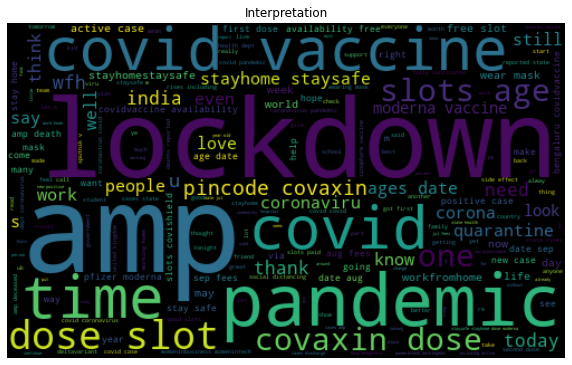

<Figure size 720x576 with 0 Axes>

In [150]:
plt.figure(figsize = (10,8))
# Creating wordclouds for positive, negative, neutral tweets
cloud_of_Words(df_final['clean_texts'], 'Interpretation')

In [155]:
# words = " ".join(df_final['clean_texts'])
# wordss: list[str] = nltk.word_tokenize(words)
# fd = nltk.FreqDist(wordss)

In [107]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

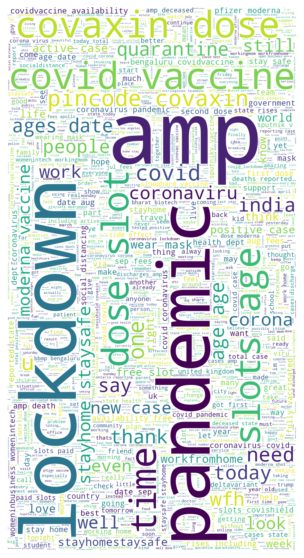

In [152]:
words = " ".join(df_final['clean_texts'])
def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

## Need to delete amp word from corpus.()
* stopwords = nltk.corpus.stopwords.words('english')
* newStopWords = ['stopWord1','stopWord2']
* stopwords.extend(newStopWords)

# NLTK

In [156]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ayushjain9\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [262]:
df_final['scores'] = df_final['clean_texts'].apply(lambda review: sid.polarity_scores(review))

df_final.head()

,country,subcountry,user_followers,user_verified,date,text,hashtags,retweets,likes_count,clean_texts,tokenized_texts,scores,compound,comp_score,clean_texts_no_Stopwords
0,India,Maharashtra,370,FALSE,2020-03-01,I landed in Mumbai at midnight and there was absolutely no thermal scan or temperature check. #covid,['covid'],0,0,landed mumbai midnight absolutely no thermal scan temperature check covid,"[landed, mumbai, midnight, absolutely, no, thermal, scan, temperature, check, covid]","{'neg': 0.217, 'neu': 0.783, 'pos': 0.0, 'compound': -0.3597}",0.0000,ntl,landed mumbai midnight absolutely no thermal scan temperature check covid
1,Bangladesh,Dhaka,57502,FALSE,2020-03-01,"Here are the latest developments on the #coronavirusoutbreak:\n\n-A boom of cases in Italy, Iran and the U.K.\n-Italy to spend $4B on coronavirus fight\n-New York gets OK to develop its own coronavirus test\n\n#COVID #Coronavid19 https://t.co/t9I7scIuNi","['coronavirusoutbreak', 'COVID', 'Coronavid19']",7,12,latest developments coronavirusoutbreak a boom cases italy iran u k italy spend coronavirus fight new york gets ok develop coronavirus test covid,"[latest, developments, coronavirusoutbreak, a, boom, cases, italy, iran, u, k, italy, spend, coronavirus, fight, new, york, gets, ok, develop, coronavirus, test, covid]","{'neg': 0.119, 'neu': 0.78, 'pos': 0.101, 'compound': -0.1027}",-0.1027,neg,latest developments coronavirusoutbreak a boom cases italy iran u k italy spend coronavirus fight new york gets ok develop coronavirus test covid
2,United Arab Emirates,Dubai,2061,TRUE,2020-03-01,@UltraAbuDhabi @MEFCC to go ahead as scheduled. @DJmag Middle East stands cancelled. Experts give their valuable advice on safety protocols at massive events! #COVID https://t.co/0XVKPI4Hb3,['COVID'],0,0,go ahead scheduled middle east stands cancelled experts give valuable advice safety protocols massive events covid,"[go, ahead, scheduled, middle, east, stands, cancelled, experts, give, valuable, advice, safety, protocols, massive, events, covid]","{'neg': 0.096, 'neu': 0.622, 'pos': 0.282, 'compound': 0.5994}",0.5994,pos,go ahead scheduled middle east stands cancelled experts give valuable advice safety protocols massive events covid
4,Sri Lanka,NaN,850,FALSE,2020-03-01,"@warunawijesuriy Hey buddy, I think today #Armenia Records his first patient who suffered #COVID","['Armenia', 'COVID']",0,0,hey buddy think today armenia records first patient suffered covid,"[hey, buddy, think, today, armenia, records, first, patient, suffered, covid]","{'neg': 0.262, 'neu': 0.738, 'pos': 0.0, 'compound': -0.4939}",-0.4939,neg,hey buddy think today armenia records first patient suffered covid
5,India,NCT,908,FALSE,2020-03-01,This is what keeps India alive..\n#Section144\n#SundayMotivation\n#COVID\nhttps://t.co/eD05WlkXQB,"['Section144', 'SundayMotivation', 'COVID']",1,2,keeps india alive sundaymotivation covid,"[keeps, india, alive, sundaymotivation, covid]","{'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'compound': 0.3818}",0.3818,pos,keeps india alive sundaymotivation covid


In [263]:
df_final['compound']  = df_final['scores'].apply(lambda score_dict: score_dict['compound'])

df_final.head()

,country,subcountry,user_followers,user_verified,date,text,hashtags,retweets,likes_count,clean_texts,tokenized_texts,scores,compound,comp_score,clean_texts_no_Stopwords
0,India,Maharashtra,370,FALSE,2020-03-01,I landed in Mumbai at midnight and there was absolutely no thermal scan or temperature check. #covid,['covid'],0,0,landed mumbai midnight absolutely no thermal scan temperature check covid,"[landed, mumbai, midnight, absolutely, no, thermal, scan, temperature, check, covid]","{'neg': 0.217, 'neu': 0.783, 'pos': 0.0, 'compound': -0.3597}",-0.3597,ntl,landed mumbai midnight absolutely no thermal scan temperature check covid
1,Bangladesh,Dhaka,57502,FALSE,2020-03-01,"Here are the latest developments on the #coronavirusoutbreak:\n\n-A boom of cases in Italy, Iran and the U.K.\n-Italy to spend $4B on coronavirus fight\n-New York gets OK to develop its own coronavirus test\n\n#COVID #Coronavid19 https://t.co/t9I7scIuNi","['coronavirusoutbreak', 'COVID', 'Coronavid19']",7,12,latest developments coronavirusoutbreak a boom cases italy iran u k italy spend coronavirus fight new york gets ok develop coronavirus test covid,"[latest, developments, coronavirusoutbreak, a, boom, cases, italy, iran, u, k, italy, spend, coronavirus, fight, new, york, gets, ok, develop, coronavirus, test, covid]","{'neg': 0.119, 'neu': 0.78, 'pos': 0.101, 'compound': -0.1027}",-0.1027,neg,latest developments coronavirusoutbreak a boom cases italy iran u k italy spend coronavirus fight new york gets ok develop coronavirus test covid
2,United Arab Emirates,Dubai,2061,TRUE,2020-03-01,@UltraAbuDhabi @MEFCC to go ahead as scheduled. @DJmag Middle East stands cancelled. Experts give their valuable advice on safety protocols at massive events! #COVID https://t.co/0XVKPI4Hb3,['COVID'],0,0,go ahead scheduled middle east stands cancelled experts give valuable advice safety protocols massive events covid,"[go, ahead, scheduled, middle, east, stands, cancelled, experts, give, valuable, advice, safety, protocols, massive, events, covid]","{'neg': 0.096, 'neu': 0.622, 'pos': 0.282, 'compound': 0.5994}",0.5994,pos,go ahead scheduled middle east stands cancelled experts give valuable advice safety protocols massive events covid
4,Sri Lanka,NaN,850,FALSE,2020-03-01,"@warunawijesuriy Hey buddy, I think today #Armenia Records his first patient who suffered #COVID","['Armenia', 'COVID']",0,0,hey buddy think today armenia records first patient suffered covid,"[hey, buddy, think, today, armenia, records, first, patient, suffered, covid]","{'neg': 0.262, 'neu': 0.738, 'pos': 0.0, 'compound': -0.4939}",-0.4939,neg,hey buddy think today armenia records first patient suffered covid
5,India,NCT,908,FALSE,2020-03-01,This is what keeps India alive..\n#Section144\n#SundayMotivation\n#COVID\nhttps://t.co/eD05WlkXQB,"['Section144', 'SundayMotivation', 'COVID']",1,2,keeps india alive sundaymotivation covid,"[keeps, india, alive, sundaymotivation, covid]","{'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'compound': 0.3818}",0.3818,pos,keeps india alive sundaymotivation covid


In [264]:
df_final['comp_score'] = df_final['compound'].apply(lambda c: 'pos' if c >0 else ('ntl' if c ==0 else 'neg'))

df_final.head()

,country,subcountry,user_followers,user_verified,date,text,hashtags,retweets,likes_count,clean_texts,tokenized_texts,scores,compound,comp_score,clean_texts_no_Stopwords
0,India,Maharashtra,370,FALSE,2020-03-01,I landed in Mumbai at midnight and there was absolutely no thermal scan or temperature check. #covid,['covid'],0,0,landed mumbai midnight absolutely no thermal scan temperature check covid,"[landed, mumbai, midnight, absolutely, no, thermal, scan, temperature, check, covid]","{'neg': 0.217, 'neu': 0.783, 'pos': 0.0, 'compound': -0.3597}",-0.3597,neg,landed mumbai midnight absolutely no thermal scan temperature check covid
1,Bangladesh,Dhaka,57502,FALSE,2020-03-01,"Here are the latest developments on the #coronavirusoutbreak:\n\n-A boom of cases in Italy, Iran and the U.K.\n-Italy to spend $4B on coronavirus fight\n-New York gets OK to develop its own coronavirus test\n\n#COVID #Coronavid19 https://t.co/t9I7scIuNi","['coronavirusoutbreak', 'COVID', 'Coronavid19']",7,12,latest developments coronavirusoutbreak a boom cases italy iran u k italy spend coronavirus fight new york gets ok develop coronavirus test covid,"[latest, developments, coronavirusoutbreak, a, boom, cases, italy, iran, u, k, italy, spend, coronavirus, fight, new, york, gets, ok, develop, coronavirus, test, covid]","{'neg': 0.119, 'neu': 0.78, 'pos': 0.101, 'compound': -0.1027}",-0.1027,neg,latest developments coronavirusoutbreak a boom cases italy iran u k italy spend coronavirus fight new york gets ok develop coronavirus test covid
2,United Arab Emirates,Dubai,2061,TRUE,2020-03-01,@UltraAbuDhabi @MEFCC to go ahead as scheduled. @DJmag Middle East stands cancelled. Experts give their valuable advice on safety protocols at massive events! #COVID https://t.co/0XVKPI4Hb3,['COVID'],0,0,go ahead scheduled middle east stands cancelled experts give valuable advice safety protocols massive events covid,"[go, ahead, scheduled, middle, east, stands, cancelled, experts, give, valuable, advice, safety, protocols, massive, events, covid]","{'neg': 0.096, 'neu': 0.622, 'pos': 0.282, 'compound': 0.5994}",0.5994,pos,go ahead scheduled middle east stands cancelled experts give valuable advice safety protocols massive events covid
4,Sri Lanka,NaN,850,FALSE,2020-03-01,"@warunawijesuriy Hey buddy, I think today #Armenia Records his first patient who suffered #COVID","['Armenia', 'COVID']",0,0,hey buddy think today armenia records first patient suffered covid,"[hey, buddy, think, today, armenia, records, first, patient, suffered, covid]","{'neg': 0.262, 'neu': 0.738, 'pos': 0.0, 'compound': -0.4939}",-0.4939,neg,hey buddy think today armenia records first patient suffered covid
5,India,NCT,908,FALSE,2020-03-01,This is what keeps India alive..\n#Section144\n#SundayMotivation\n#COVID\nhttps://t.co/eD05WlkXQB,"['Section144', 'SundayMotivation', 'COVID']",1,2,keeps india alive sundaymotivation covid,"[keeps, india, alive, sundaymotivation, covid]","{'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'compound': 0.3818}",0.3818,pos,keeps india alive sundaymotivation covid


In [265]:
df_final['clean_texts'].duplicated().sum()

0

In [266]:
df_final = df_final.drop_duplicates(subset=['clean_texts'], keep='last')

In [270]:
# df_new = df_final.drop(['subcountry','clean_texts_no_Stopwords','scores','compound'], axis =1)
df_new = df_final.drop(['subcountry','scores','compound','retweets','hashtags','user_followers','user_verified','likes_count','clean_texts_no_Stopwords'], axis =1)
df_new.head()

,country,date,text,clean_texts,tokenized_texts,comp_score
0,India,2020-03-01,I landed in Mumbai at midnight and there was absolutely no thermal scan or temperature check. #covid,landed mumbai midnight absolutely no thermal scan temperature check covid,"[landed, mumbai, midnight, absolutely, no, thermal, scan, temperature, check, covid]",neg
1,Bangladesh,2020-03-01,"Here are the latest developments on the #coronavirusoutbreak:\n\n-A boom of cases in Italy, Iran and the U.K.\n-Italy to spend $4B on coronavirus fight\n-New York gets OK to develop its own coronavirus test\n\n#COVID #Coronavid19 https://t.co/t9I7scIuNi",latest developments coronavirusoutbreak a boom cases italy iran u k italy spend coronavirus fight new york gets ok develop coronavirus test covid,"[latest, developments, coronavirusoutbreak, a, boom, cases, italy, iran, u, k, italy, spend, coronavirus, fight, new, york, gets, ok, develop, coronavirus, test, covid]",neg
2,United Arab Emirates,2020-03-01,@UltraAbuDhabi @MEFCC to go ahead as scheduled. @DJmag Middle East stands cancelled. Experts give their valuable advice on safety protocols at massive events! #COVID https://t.co/0XVKPI4Hb3,go ahead scheduled middle east stands cancelled experts give valuable advice safety protocols massive events covid,"[go, ahead, scheduled, middle, east, stands, cancelled, experts, give, valuable, advice, safety, protocols, massive, events, covid]",pos
4,Sri Lanka,2020-03-01,"@warunawijesuriy Hey buddy, I think today #Armenia Records his first patient who suffered #COVID",hey buddy think today armenia records first patient suffered covid,"[hey, buddy, think, today, armenia, records, first, patient, suffered, covid]",neg
5,India,2020-03-01,This is what keeps India alive..\n#Section144\n#SundayMotivation\n#COVID\nhttps://t.co/eD05WlkXQB,keeps india alive sundaymotivation covid,"[keeps, india, alive, sundaymotivation, covid]",pos


In [271]:
df_new['comp_score'].value_counts()

pos    148177
ntl     84620
neg     68082
Name: comp_score, dtype: int64

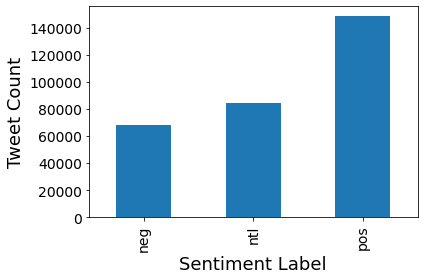

In [269]:
df_new['comp_score'].value_counts().sort_index().plot.bar()
plt.xlabel('Sentiment Label', fontsize=18)
plt.ylabel('Tweet Count', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()
# df_new.plot(x="comp_score", y="", kind="bar", ax=ax, color="maroon")

## Negative is lower then positive sentiment

In [283]:
# raw_df1 = df_new[df_new['clean_texts'].str.contains('\b' + '\b|\b'.join('amp']) + '\b')]

# Model Building

In [286]:
# words = [w for w in nltk.corpus.vader_lexicon.words() if w.isalpha()]
# finder = nltk.collocations.TrigramCollocationFinder.from_words(words)

In [294]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector = TfidfVectorizer(ngram_range=(1,2),min_df=1)
vector.fit(df_new['clean_texts'])
vect_X = vector.fit_transform(df_new['clean_texts'])

In [295]:
raw_df= pd.DataFrame(vect_X.toarray(),columns=vector.get_feature_names())

MemoryError: Unable to allocate 5.31 TiB for an array with shape (300879, 2424768) and data type float64